In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
data = pd.read_csv(url, skiprows=23, low_memory=False)

In [2]:
data['date'] = pd.to_datetime(data['date'], format='%d-%b-%Y %H:%M')

## Plot the temperature

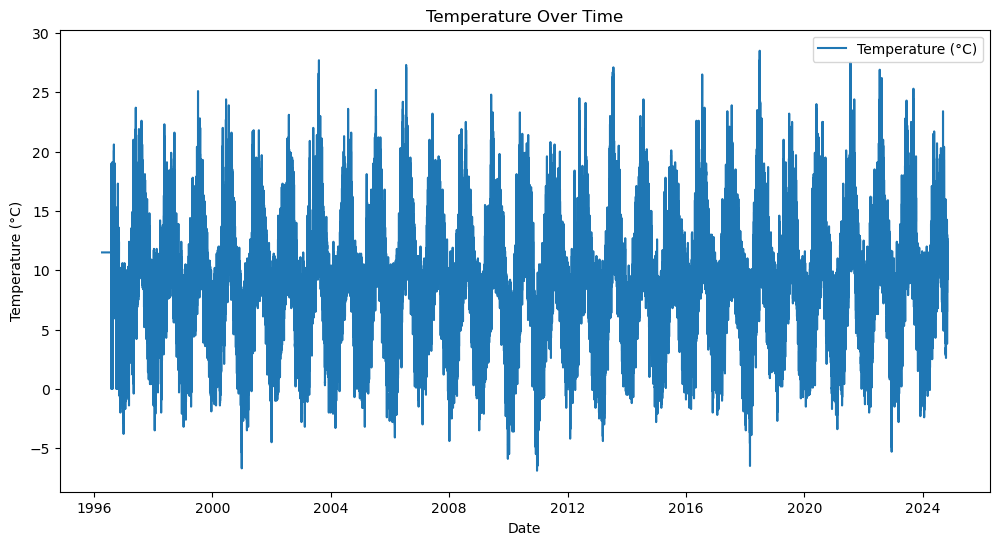

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['temp'], label='Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

## Plot the mean temperature each day

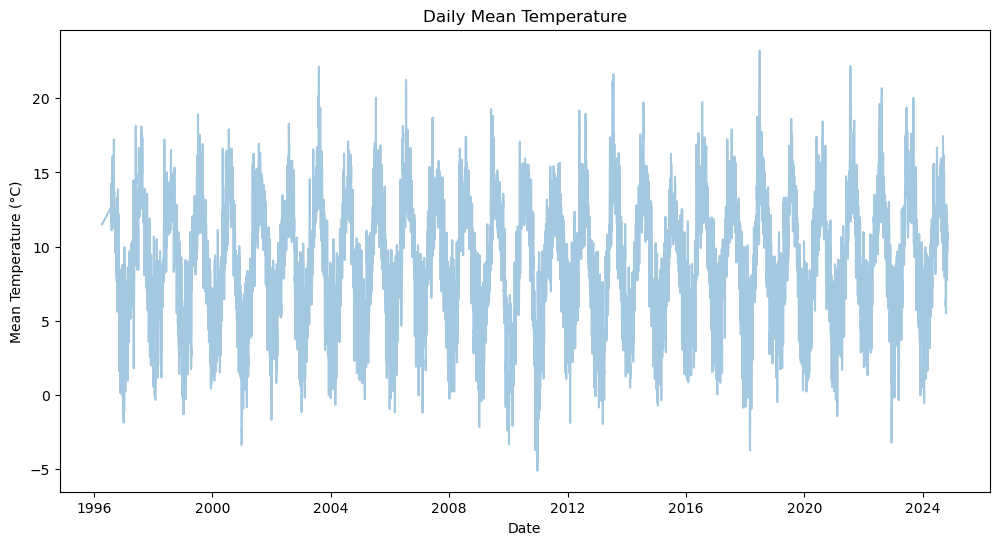

In [4]:
daily_mean_temp = data.groupby(data['date'].dt.date)['temp'].mean()
daily_mean_temp.plot(figsize=(12, 6), alpha=0.4)
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Daily Mean Temperature')
plt.show()

## Plot the mean temperature for each month

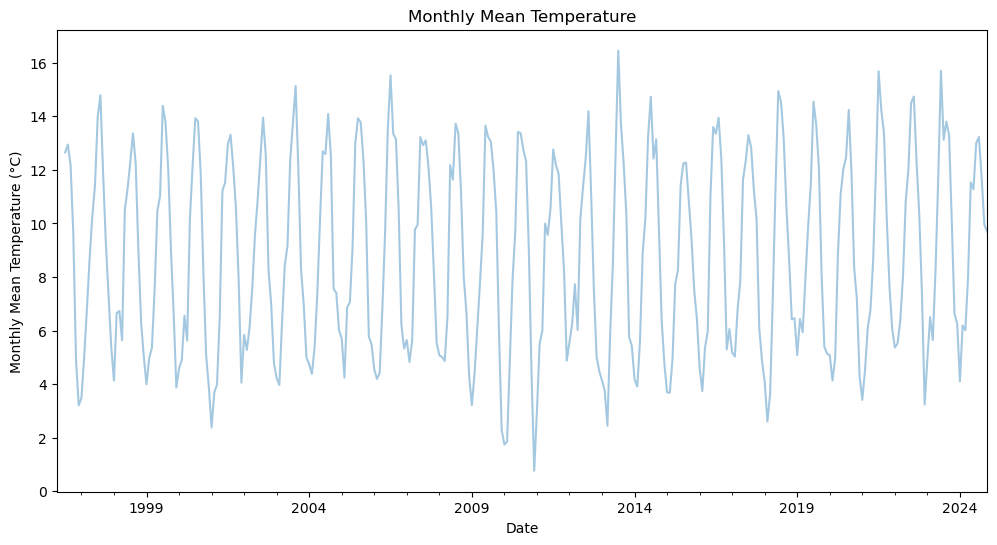

In [5]:
monthly_mean_temp = data.resample('ME', on='date')['temp'].mean()
monthly_mean_temp.plot( figsize=(12, 6), alpha=0.4)
plt.xlabel('Date')
plt.ylabel('Monthly Mean Temperature (°C)')
plt.title('Monthly Mean Temperature')
plt.show()

## Plot the windspeed

In [6]:
data['wdsp'] = pd.to_numeric(data['wdsp'],errors ='coerce')
data['wdsp'] = data['wdsp'].replace(0, np.nan)
missing_count = data['wdsp'].isna().sum()
print(f"Number of missing values in 'wdsp': {missing_count}")

Number of missing values in 'wdsp': 458


In [7]:
data['wdsp_interpolated'] = data['wdsp'].interpolate()

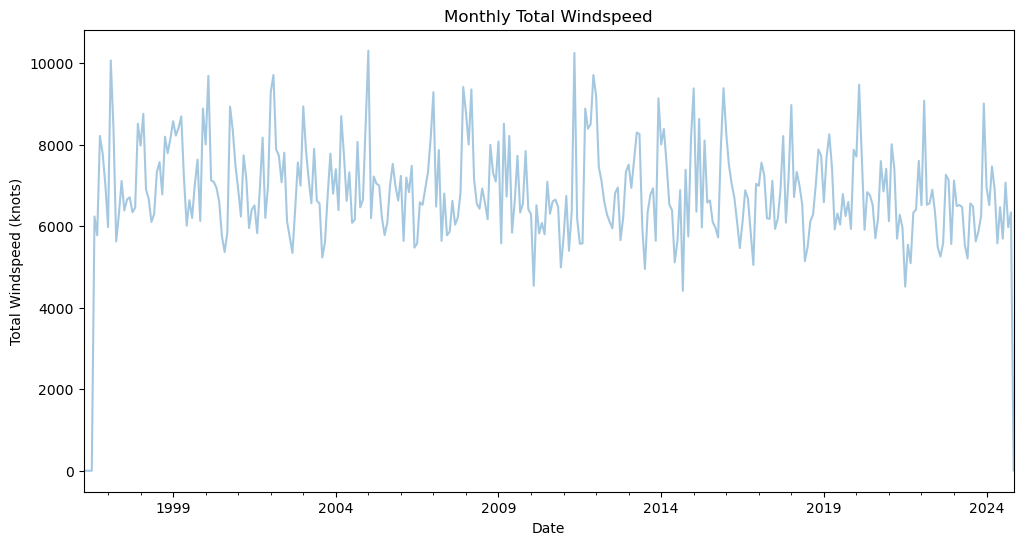

In [8]:
monthly_windspeed = data.resample('ME', on='date')['wdsp'].sum()
monthly_windspeed.plot(figsize=(12, 6), alpha=0.4,)
plt.xlabel('Date')
plt.ylabel('Total Windspeed (knots)')
plt.title('Monthly Total Windspeed')
plt.show()


## Plot rolling windspeed over 24hours

In [9]:
data['wdsp_rolling_24h'] = data['wdsp'].rolling(24).mean()

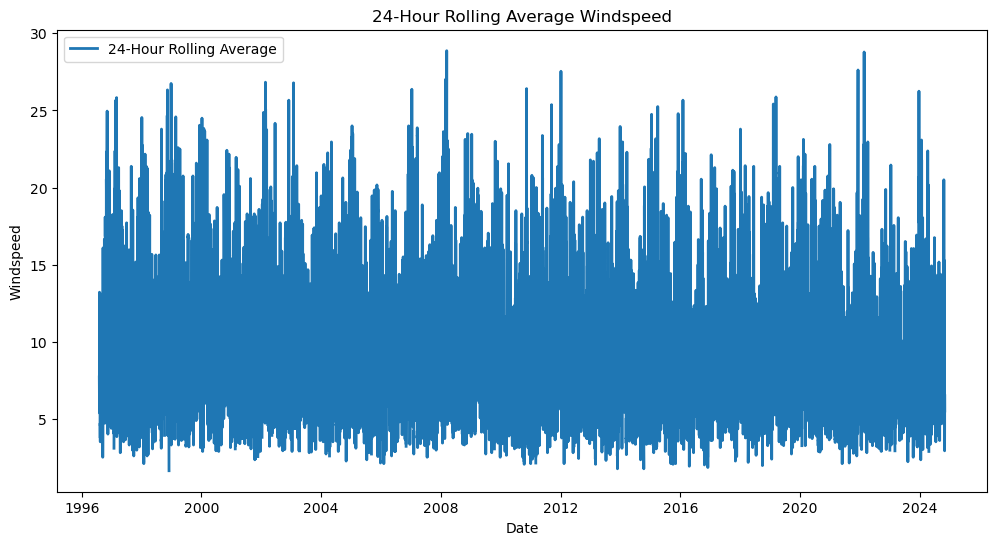

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['wdsp_rolling_24h'], label='24-Hour Rolling Average', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Windspeed')
plt.title('24-Hour Rolling Average Windspeed')
plt.legend()
plt.show()

## The max windspeed for each day

In [11]:
data.set_index('date', inplace=True)
daily_max_windspeed = data['wdsp'].resample('D').max().interpolate()

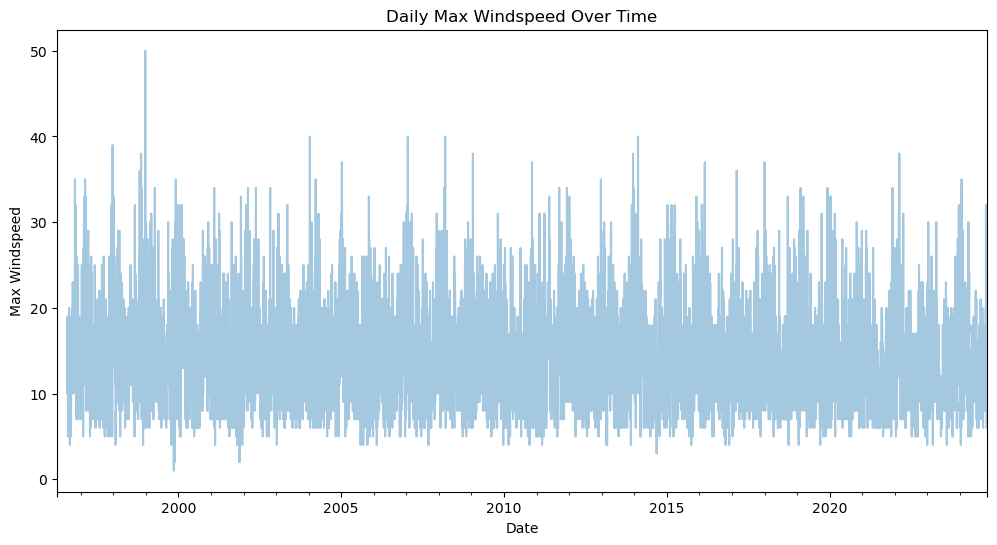

In [12]:
daily_max_windspeed.plot(figsize=(12, 6), alpha=0.4,)
plt.xlabel('Date')
plt.ylabel('Max Windspeed')
plt.title('Daily Max Windspeed Over Time')
plt.show()

## Plot monthly mean of daily max windspeeds

In [13]:
daily_max_windspeed = data['wdsp'].resample('D').max()
monthly_mean_daily_max_windspeed = daily_max_windspeed.resample('ME').mean()

# Display the result
print(monthly_mean_daily_max_windspeed.head())

date
1996-04-30          NaN
1996-05-31          NaN
1996-06-30          NaN
1996-07-31          NaN
1996-08-31    12.516129
Freq: ME, Name: wdsp, dtype: float64


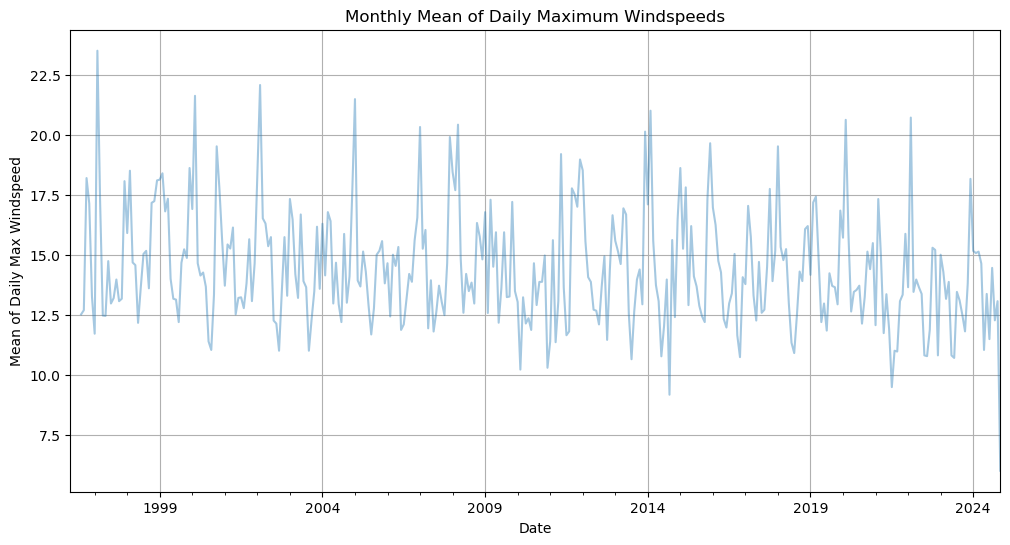

In [15]:
monthly_mean_daily_max_windspeed.plot(figsize=(12, 6), alpha=0.4,)
plt.xlabel('Date')
plt.ylabel('Mean of Daily Max Windspeed')
plt.title('Monthly Mean of Daily Maximum Windspeeds')
plt.grid(True)
plt.show()